# ETF Investing and Index Replication / Tracking

## Index Tracking with Optimization (Part 1) - The S&P 500 Constituents

__Objectives__:

1. Find a portfolio that tracks the S&P best with just 50 stocks.
   - The S&P has 500 stocks and we want to reduce trading costs.
  
2. Find the optimal number of stocks to track the S%P efficiently
  

__Method__:

1. Use Optimizer through making simulated portfolios
   - This optimization makes 1000 different, simulated portfolios using random 50 stocks from the S&P
   - These simulated portfolios are weighted by market cap.
   - We will use the portfolio that has the lowest tracking error

2. Chart out the average tracking error for each portfolio size (ranging from 0-500). The method of contructing these portfolios are the same as what was mentioned above!

3. 
   
__Key Learnings from this Project__:

1. Average tracking error for all 1000 simulations was at 7.57%. This was if we were to take just 50 stocks (from 2019 till date)
2. Marginal benefit significantly decreases past the 110 sample mark as could be seen in the graph. Therefore, we can optimally track the S&P500 with about 110 stocks, with an average tracking error of 3.67%. (Please check out the graph below for more details!)
3. 


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

__List with all 503 Constituents__

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [ ]:
df = pd.read_html(url)[0]
df

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [486]:
df.rename(columns = {"Date added":"Date_Added"}, inplace = True)

In [488]:
df.Date_Added = pd.to_datetime(df.Date_Added, errors = "coerce")

In [490]:
df.Date_Added.sort_values(ascending = False).head(50)

24    2024-09-30
143   2024-09-23
362   2024-09-23
177   2024-09-23
419   2024-07-08
132   2024-06-24
221   2024-06-24
278   2024-06-24
477   2024-05-08
211   2024-04-02
421   2024-04-01
430   2024-03-18
141   2024-03-18
263   2023-12-18
458   2023-12-18
76    2023-12-18
240   2023-10-18
296   2023-10-18
469   2023-10-02
65    2023-09-18
11    2023-09-18
271   2023-08-25
363   2023-06-20
54    2023-05-04
190   2023-03-20
77    2023-03-15
250   2023-03-15
210   2023-01-04
427   2022-12-22
196   2022-12-19
42    2022-11-01
438   2022-10-12
372   2022-10-03
173   2022-10-03
259   2022-09-19
129   2022-09-19
356   2022-06-21
272   2022-06-21
475   2022-06-08
485   2022-04-11
82    2022-04-04
323   2022-03-02
342   2022-02-15
123   2022-02-02
189   2021-12-20
172   2021-12-14
140   2021-09-20
74    2021-09-20
307   2021-09-20
62    2021-08-30
Name: Date_Added, dtype: datetime64[ns]

In [492]:
symbols = list(df.Symbol)
symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [494]:
symbols = [symbol.replace(".", "-") for symbol in symbols]
symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

In [496]:
symbols.append("^GSPC")

In [498]:
symbols

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

__Historical Prices__

In [501]:
df = yf.download(symbols)
df

[*********************100%%**********************]  504 of 504 completed


Price        Adj Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
1927-12-30         NaN         NaN         NaN         NaN         NaN   
1928-01-03         NaN         NaN         NaN         NaN         NaN   
1928-01-04         NaN         NaN         NaN         NaN         NaN   
1928-01-05         NaN         NaN         NaN         NaN         NaN   
1928-01-06         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2024-09-25  139.218369  226.369995  191.259995  130.710007  112.610001   
2024-09-26  146.506775  227.520004  191.899994  129.250000  112.730003   
2024-09-27  147.824661  227.789993  194.789993  128.250000  112.430000   
2024-09-30  148.244003  233.000000  197.479996  126.809998  114.010002   
2024-10-01  146.559998  226.210007  196.960007  125.470001  113.559998   

Price                                                                  ...  \
Ticker            ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                   ...   
1927-12-30         NaN         NaN         NaN         NaN        NaN  ...   
1928-01-03         NaN         NaN         NaN         NaN        NaN  ...   
1928-01-04         NaN         NaN         NaN         NaN        NaN  ...   
1928-01-05         NaN         NaN         NaN         NaN        NaN  ...   
1928-01-06         NaN         NaN         NaN         NaN        NaN  ...   
...                ...         ...         ...         ...        ...  ...   
2024-09-25  113.070000  337.049988  517.900024  226.639999  58.139999  ...   
2024-09-26  112.570000  355.809998  515.380005  232.460007  59.369999  ...   
2024-09-27  113.410004  349.700012  515.479980  232.050003  60.000000  ...   
2024-09-30  111.879997  353.480011  517.780029  230.169998  59.740002  ...   
2024-10-01  113.510002  351.980011  502.799988  223.669998  59.520000  ...   

Price          Volume                                                \
Ticker             WY        WYNN        XEL         XOM        XYL   
Date                                                                  
1927-12-30        NaN         NaN        NaN         NaN        NaN   
1928-01-03        NaN         NaN        NaN         NaN        NaN   
1928-01-04        NaN         NaN        NaN         NaN        NaN   
1928-01-05        NaN         NaN        NaN         NaN        NaN   
1928-01-06        NaN         NaN        NaN         NaN        NaN   
...               ...         ...        ...         ...        ...   
2024-09-25  5299100.0   2244100.0  2882900.0  13816000.0   971800.0   
2024-09-26  4791200.0   8289500.0  2031500.0  16887900.0   847000.0   
2024-09-27  4729500.0  11253100.0  1912900.0  15964000.0   691300.0   
2024-09-30  4767700.0   6224800.0  3139700.0  13247600.0  1005600.0   
2024-10-01  3394100.0   4770300.0  2601000.0  23209400.0  1377500.0   

Price                                                              
Ticker            YUM        ZBH      ZBRA        ZTS       ^GSPC  
Date                                                               
1927-12-30        NaN        NaN       NaN        NaN           0  
1928-01-03        NaN        NaN       NaN        NaN           0  
1928-01-04        NaN        NaN       NaN        NaN           0  
1928-01-05        NaN        NaN       NaN        NaN           0  
1928-01-06        NaN        NaN       NaN        NaN           0  
...               ...        ...       ...        ...         ...  
2024-09-25  1396100.0  1312600.0  207100.0  1906300.0  3624910000  
2024-09-26  2573000.0  1211700.0  242000.0  1556100.0  4391180000  
2024-09-27  2778300.0  1166200.0  213600.0  1343700.0  3898530000  
2024-09-30  2267200.0  1024800.0  217400.0  1838200.0  4425

In [523]:
df = df.loc["2019":].copy()
df

Price        Adj Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2019-01-02   63.061287   37.750084   68.699387         NaN   62.953060   
2019-01-03   60.738140   33.989887   66.435829         NaN   59.982056   
2019-01-04   62.840485   35.440910   68.576157         NaN   61.694004   
2019-01-07   64.174858   35.362007   69.577072         NaN   62.617928   
2019-01-08   65.115685   36.036125   69.900444         NaN   61.866104   
...                ...         ...         ...         ...         ...   
2024-09-25  139.218369  226.369995  191.259995  130.710007  112.610001   
2024-09-26  146.506775  227.520004  191.899994  129.250000  112.730003   
2024-09-27  147.824661  227.789993  194.789993  128.250000  112.430000   
2024-09-30  148.244003  233.000000  197.479996  126.809998  114.010002   
2024-10-01  146.559998  226.210007  196.960007  125.470001  113.559998   

Price                                                                  ...  \
Ticker            ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                   ...   
2019-01-02   26.190001  129.528763  224.570007   77.160187  34.914429  ...   
2019-01-03   25.780001  125.106392  215.699997   72.499306  34.760952  ...   
2019-01-04   26.389999  129.970963  226.190002   74.259491  35.562401  ...   
2019-01-07   26.330000  130.422440  229.259995   74.726479  35.741455  ...   
2019-01-08   26.430000  133.720795  232.679993   76.549507  36.406487  ...   
...                ...         ...         ...         ...        ...  ...   
2024-09-25  113.070000  337.049988  517.900024  226.639999  58.139999  ...   
2024-09-26  112.570000  355.809998  515.380005  232.460007  59.369999  ...   
2024-09-27  113.410004  349.700012  515.479980  232.050003  60.000000  ...   
2024-09-30  111.879997  353.480011  517.780029  230.169998  59.740002  ...   
2024-10-01  113.510002  351.980011  502.799988  223.669998  59.520000  ...   

Price          Volume                                                \
Ticker             WY        WYNN        XEL         XOM        XYL   
Date                                                                  
2019-01-02  7442000.0   4174400.0  4476100.0  16727200.0   990900.0   
2019-01-03  9788300.0   2885100.0  5287600.0  13866100.0  1243100.0   
2019-01-04  5843900.0   3007200.0  5535600.0  16043600.0   970900.0   
2019-01-07  6562200.0   3143800.0  4208100.0  10844200.0  1341600.0   
2019-01-08  6232800.0   2255700.0  3128300.0  11439000.0   912800.0   
...               ...         ...        ...         ...        ...   
2024-09-25  5299100.0   2244100.0  2882900.0  13816000.0   971800.0   
2024-09-26  4791200.0   8289500.0  2031500.0  16887900.0   847000.0   
2024-09-27  4729500.0  11253100.0  1912900.0  15964000.0   691300.0   
2024-09-30  4767700.0   6224800.0  3139700.0  13247600.0  1005600.0   
2024-10-01  3394100.0   4770300.0  2601000.0  23209400.0  1377500.0   

Price                                                               
Ticker            YUM        ZBH       ZBRA        ZTS       ^GSPC  
Date                                                                
2019-01-02  1743400.0  1186663.0   347700.0  2665600.0  3733160000  
2019-01-03  2680300.0  1201083.0   514600.0  2390900.0  3858830000  
2019-01-04  2142700.0  1627812.0   723300.0  3383500.0  4234140000  
2019-01-07  2561100.0   927309.0  1100000.0  2360800.0  4133120000  
2019-01-08  2604700.0  3356770.0   838500.0  2250300.0  4120060000  
...               ...        ...        ...        ...         ...  
2024-09-25  1396100.0  1312600.0   207100.0  1906300.0  3624910000  
2024-09-26  2573000.0  1211700.0   242000.0  1556100.0  4391180000  
2024-09-27  2778300.0  1166200.0   213600.0  1343700.0  3898530000  
2024-09-30  2267200.0  1024800.0   217400.0  18

In [527]:
df.to_csv("SP500_Const.csv")

In [528]:
const = pd.read_csv("SP500_Const.csv", header =[0,1], index_col = 0, parse_dates = [0])
const

Price        Adj Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2019-01-02   63.061287   37.750084   68.699387         NaN   62.953060   
2019-01-03   60.738140   33.989887   66.435829         NaN   59.982056   
2019-01-04   62.840485   35.440910   68.576157         NaN   61.694004   
2019-01-07   64.174858   35.362007   69.577072         NaN   62.617928   
2019-01-08   65.115685   36.036125   69.900444         NaN   61.866104   
...                ...         ...         ...         ...         ...   
2024-09-25  139.218369  226.369995  191.259995  130.710007  112.610001   
2024-09-26  146.506775  227.520004  191.899994  129.250000  112.730003   
2024-09-27  147.824661  227.789993  194.789993  128.250000  112.430000   
2024-09-30  148.244003  233.000000  197.479996  126.809998  114.010002   
2024-10-01  146.559998  226.210007  196.960007  125.470001  113.559998   

Price                                                                  ...  \
Ticker            ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                   ...   
2019-01-02   26.190001  129.528763  224.570007   77.160187  34.914429  ...   
2019-01-03   25.780001  125.106392  215.699997   72.499306  34.760952  ...   
2019-01-04   26.389999  129.970963  226.190002   74.259491  35.562401  ...   
2019-01-07   26.330000  130.422440  229.259995   74.726479  35.741455  ...   
2019-01-08   26.430000  133.720795  232.679993   76.549507  36.406487  ...   
...                ...         ...         ...         ...        ...  ...   
2024-09-25  113.070000  337.049988  517.900024  226.639999  58.139999  ...   
2024-09-26  112.570000  355.809998  515.380005  232.460007  59.369999  ...   
2024-09-27  113.410004  349.700012  515.479980  232.050003  60.000000  ...   
2024-09-30  111.879997  353.480011  517.780029  230.169998  59.740002  ...   
2024-10-01  113.510002  351.980011  502.799988  223.669998  59.520000  ...   

Price          Volume                                                \
Ticker             WY        WYNN        XEL         XOM        XYL   
Date                                                                  
2019-01-02  7442000.0   4174400.0  4476100.0  16727200.0   990900.0   
2019-01-03  9788300.0   2885100.0  5287600.0  13866100.0  1243100.0   
2019-01-04  5843900.0   3007200.0  5535600.0  16043600.0   970900.0   
2019-01-07  6562200.0   3143800.0  4208100.0  10844200.0  1341600.0   
2019-01-08  6232800.0   2255700.0  3128300.0  11439000.0   912800.0   
...               ...         ...        ...         ...        ...   
2024-09-25  5299100.0   2244100.0  2882900.0  13816000.0   971800.0   
2024-09-26  4791200.0   8289500.0  2031500.0  16887900.0   847000.0   
2024-09-27  4729500.0  11253100.0  1912900.0  15964000.0   691300.0   
2024-09-30  4767700.0   6224800.0  3139700.0  13247600.0  1005600.0   
2024-10-01  3394100.0   4770300.0  2601000.0  23209400.0  1377500.0   

Price                                                               
Ticker            YUM        ZBH       ZBRA        ZTS       ^GSPC  
Date                                                                
2019-01-02  1743400.0  1186663.0   347700.0  2665600.0  3733160000  
2019-01-03  2680300.0  1201083.0   514600.0  2390900.0  3858830000  
2019-01-04  2142700.0  1627812.0   723300.0  3383500.0  4234140000  
2019-01-07  2561100.0   927309.0  1100000.0  2360800.0  4133120000  
2019-01-08  2604700.0  3356770.0   838500.0  2250300.0  4120060000  
...               ...        ...        ...        ...         ...  
2024-09-25  1396100.0  1312600.0   207100.0  1906300.0  3624910000  
2024-09-26  2573000.0  1211700.0   242000.0  1556100.0  4391180000  
2024-09-27  2778300.0  1166200.0   213600.0  1343700.0  3898530000  
2024-09-30  2267200.0  1024800.0   217400.0  18

__Data Cleaning and Preparation__

In [531]:
close = const.loc["2019":, "Close"]
close

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.690002,39.480000,89.230003,NaN,69.500000,26.190001,140.589996,224.570007,85.919998,40.950001,...,21.530001,104.400002,48.220001,69.690002,66.510002,91.440002,99.300972,156.240005,84.480003,2510.030029
2019-01-03,63.270000,35.547501,86.290001,NaN,66.220001,25.780001,135.789993,215.699997,80.730003,40.770000,...,22.260000,103.389999,48.029999,68.620003,64.230003,89.139999,97.504852,146.880005,81.559998,2447.889893
2019-01-04,65.459999,37.064999,89.070000,NaN,68.110001,26.389999,141.070007,226.190002,82.690002,41.709999,...,23.020000,107.559998,48.500000,71.150002,66.940002,91.459999,100.834953,152.970001,84.760002,2531.939941
2019-01-07,66.849998,36.982498,90.370003,NaN,69.129997,26.330000,141.559998,229.259995,83.209999,41.919998,...,23.480000,109.470001,48.290001,71.519997,65.949997,91.360001,100.873787,155.289993,85.269997,2549.689941
2019-01-08,67.830002,37.687500,90.790001,NaN,68.300003,26.430000,145.139999,232.679993,85.239998,42.700001,...,23.620001,112.900002,48.849998,72.040001,66.570000,91.180000,98.611649,156.330002,86.540001,2574.409912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,139.440002,226.369995,191.259995,130.710007,112.610001,113.070000,337.049988,517.900024,226.639999,58.139999,...,32.970001,84.129997,64.190002,114.769997,133.610001,133.089996,106.500000,364.970001,191.529999,5722.259766
2024-09-26,146.740005,227.520004,191.899994,129.250000,112.730003,112.570000,355.809998,515.380005,232.460007,59.369999,...,33.160000,91.029999,63.980000,112.800003,134.130005,138.070007,107.709999,371.239990,194.869995,5745.370117
2024-09-27,148.059998,227.789993,194.789993,128.250000,112.430000,113.410004,349.700012,515.479980,232.050003,60.000000,...,33.750000,97.620003,64.570000,115.820000,134.509995,139.919998,108.220001,368.600006,194.809998,5738.169922


In [538]:
close.dropna(axis = 1, thresh = len(close) - 1, inplace = True) # only [1] NA per Symbol allowed
close

Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.690002,39.480000,89.230003,69.500000,26.190001,140.589996,224.570007,85.919998,40.950001,130.139999,...,21.530001,104.400002,48.220001,69.690002,66.510002,91.440002,99.300972,156.240005,84.480003,2510.030029
2019-01-03,63.270000,35.547501,86.290001,66.220001,25.780001,135.789993,215.699997,80.730003,40.770000,126.209999,...,22.260000,103.389999,48.029999,68.620003,64.230003,89.139999,97.504852,146.880005,81.559998,2447.889893
2019-01-04,65.459999,37.064999,89.070000,68.110001,26.389999,141.070007,226.190002,82.690002,41.709999,131.240005,...,23.020000,107.559998,48.500000,71.150002,66.940002,91.459999,100.834953,152.970001,84.760002,2531.939941
2019-01-07,66.849998,36.982498,90.370003,69.129997,26.330000,141.559998,229.259995,83.209999,41.919998,130.529999,...,23.480000,109.470001,48.290001,71.519997,65.949997,91.360001,100.873787,155.289993,85.269997,2549.689941
2019-01-08,67.830002,37.687500,90.790001,68.300003,26.430000,145.139999,232.679993,85.239998,42.700001,131.300003,...,23.620001,112.900002,48.849998,72.040001,66.570000,91.180000,98.611649,156.330002,86.540001,2574.409912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,139.440002,226.369995,191.259995,112.610001,113.070000,337.049988,517.900024,226.639999,58.139999,275.250000,...,32.970001,84.129997,64.190002,114.769997,133.610001,133.089996,106.500000,364.970001,191.529999,5722.259766
2024-09-26,146.740005,227.520004,191.899994,112.730003,112.570000,355.809998,515.380005,232.460007,59.369999,274.429993,...,33.160000,91.029999,63.980000,112.800003,134.130005,138.070007,107.709999,371.239990,194.869995,5745.370117
2024-09-27,148.059998,227.789993,194.789993,112.430000,113.410004,349.700012,515.479980,232.050003,60.000000,272.880005,...,33.750000,97.620003,64.570000,115.820000,134.509995,139.919998,108.220001,368.600006,194.809998,5738.169922


In [553]:
close.ffill(inplace = True) # NEW
close

Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,65.690002,39.480000,89.230003,69.500000,26.190001,140.589996,224.570007,85.919998,40.950001,130.139999,...,21.530001,104.400002,48.220001,69.690002,66.510002,91.440002,99.300972,156.240005,84.480003,2510.030029
2019-01-03,63.270000,35.547501,86.290001,66.220001,25.780001,135.789993,215.699997,80.730003,40.770000,126.209999,...,22.260000,103.389999,48.029999,68.620003,64.230003,89.139999,97.504852,146.880005,81.559998,2447.889893
2019-01-04,65.459999,37.064999,89.070000,68.110001,26.389999,141.070007,226.190002,82.690002,41.709999,131.240005,...,23.020000,107.559998,48.500000,71.150002,66.940002,91.459999,100.834953,152.970001,84.760002,2531.939941
2019-01-07,66.849998,36.982498,90.370003,69.129997,26.330000,141.559998,229.259995,83.209999,41.919998,130.529999,...,23.480000,109.470001,48.290001,71.519997,65.949997,91.360001,100.873787,155.289993,85.269997,2549.689941
2019-01-08,67.830002,37.687500,90.790001,68.300003,26.430000,145.139999,232.679993,85.239998,42.700001,131.300003,...,23.620001,112.900002,48.849998,72.040001,66.570000,91.180000,98.611649,156.330002,86.540001,2574.409912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,139.440002,226.369995,191.259995,112.610001,113.070000,337.049988,517.900024,226.639999,58.139999,275.250000,...,32.970001,84.129997,64.190002,114.769997,133.610001,133.089996,106.500000,364.970001,191.529999,5722.259766
2024-09-26,146.740005,227.520004,191.899994,112.730003,112.570000,355.809998,515.380005,232.460007,59.369999,274.429993,...,33.160000,91.029999,63.980000,112.800003,134.130005,138.070007,107.709999,371.239990,194.869995,5745.370117
2024-09-27,148.059998,227.789993,194.789993,112.430000,113.410004,349.700012,515.479980,232.050003,60.000000,272.880005,...,33.750000,97.620003,64.570000,115.820000,134.509995,139.919998,108.220001,368.600006,194.809998,5738.169922


In [547]:
index = "^GSPC"

In [549]:
const = close.columns.drop([index])
const

Index(['A', 'AAPL', 'ABBV', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP',
       ...
       'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZTS'],
      dtype='object', name='Ticker', length=485)

In [556]:
norm = close.div(close.iloc[0])
norm

Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.963160,0.900393,0.967051,0.952806,0.984345,0.965858,0.960502,0.939595,0.995604,0.969802,...,1.033906,0.990326,0.996060,0.984646,0.965719,0.974847,0.981912,0.940092,0.965436,0.975243
2019-01-04,0.996499,0.938830,0.998207,0.980000,1.007636,1.003414,1.007214,0.962407,1.018559,1.008452,...,1.069206,1.030268,1.005807,1.020950,1.006465,1.000219,1.015448,0.979071,1.003314,1.008729
2019-01-07,1.017659,0.936740,1.012776,0.994676,1.005346,1.006900,1.020884,0.968459,1.023687,1.002997,...,1.090571,1.048563,1.001452,1.026259,0.991580,0.999125,1.015839,0.993920,1.009351,1.015801
2019-01-08,1.032577,0.954597,1.017483,0.982734,1.009164,1.032364,1.036113,0.992086,1.042735,1.008914,...,1.097074,1.081418,1.013065,1.033721,1.000902,0.997157,0.993058,1.000576,1.024384,1.025649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,2.122697,5.733789,2.143449,1.620288,4.317297,2.397397,2.306185,2.637803,1.419780,2.115030,...,1.531352,0.805843,1.331190,1.646865,2.008871,1.455490,1.072497,2.335957,2.267164,2.279757
2024-09-26,2.233826,5.762918,2.150622,1.622014,4.298205,2.530834,2.294964,2.705540,1.449817,2.108729,...,1.540176,0.871935,1.326835,1.618597,2.016689,1.509952,1.084682,2.376088,2.306700,2.288965
2024-09-27,2.253920,5.769757,2.183010,1.617698,4.330279,2.487375,2.295409,2.700768,1.465201,2.096819,...,1.567580,0.935057,1.339071,1.661931,2.022402,1.530184,1.089818,2.359191,2.305989,2.286096


In [587]:
returns = close.pct_change()
returns

Ticker,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.036840,-0.099607,-0.032949,-0.047194,-0.015655,-0.034142,-0.039498,-0.060405,-0.004396,-0.030198,...,0.033906,-0.009674,-0.003940,-0.015354,-0.034281,-0.025153,-0.018088,-0.059908,-0.034564,-0.024757
2019-01-04,0.034614,0.042689,0.032217,0.028541,0.023662,0.038884,0.048632,0.024278,0.023056,0.039854,...,0.034142,0.040333,0.009786,0.036870,0.042192,0.026026,0.034153,0.041462,0.039235,0.034336
2019-01-07,0.021234,-0.002226,0.014595,0.014976,-0.002274,0.003473,0.013573,0.006289,0.005035,-0.005410,...,0.019983,0.017758,-0.004330,0.005200,-0.014789,-0.001093,0.000385,0.015166,0.006017,0.007010
2019-01-08,0.014660,0.019063,0.004648,-0.012006,0.003798,0.025290,0.014918,0.024396,0.018607,0.005899,...,0.005963,0.031333,0.011597,0.007271,0.009401,-0.001970,-0.022425,0.006697,0.014894,0.009695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,-0.017128,-0.004398,-0.011627,-0.006441,-0.002470,-0.007567,-0.011773,-0.003035,-0.042648,-0.005025,...,-0.023979,-0.000357,0.000312,-0.019479,0.004284,-0.005306,-0.012151,0.001482,-0.011152,-0.001861
2024-09-26,0.052352,0.005080,0.003346,0.001066,-0.004422,0.055659,-0.004866,0.025680,0.021156,-0.002979,...,0.005763,0.082016,-0.003272,-0.017165,0.003892,0.037418,0.011361,0.017179,0.017439,0.004039
2024-09-27,0.008995,0.001187,0.015060,-0.002661,0.007462,-0.017172,0.000194,-0.001764,0.010611,-0.005648,...,0.017793,0.072394,0.009222,0.026773,0.002833,0.013399,0.004735,-0.007111,-0.000308,-0.001253


##  (Part 2) - Creating random Tracking Portfolios

In [616]:
n = len(const)
n

485

In [261]:
i = 50 # number of stock in tracking portfolio
i

50

In [263]:
np.random.seed(123)
tracking_stocks = np.random.choice(a = const, size = i, replace = False) # random sampling
tracking_stocks

array(['ROP', 'SYY', 'ACN', 'PPL', 'SNPS', 'AEE', 'FICO', 'MDLZ', 'AOS',
       'APD', 'NDAQ', 'SHW', 'D', 'LW', 'JBL', 'IT', 'KMI', 'MKTX', 'ADP',
       'IRM', 'TT', 'VRSK', 'JKHY', 'AON', 'DVN', 'TRV', 'GOOG', 'HPE',
       'AMCR', 'LDOS', 'ENPH', 'TGT', 'AES', 'USB', 'MGM', 'UAL', 'DLTR',
       'FTV', 'MKC', 'KKR', 'AIG', 'BF-B', 'CHD', 'ROST', 'SMCI', 'CAG',
       'PTC', 'CE', 'UPS', 'CPT'], dtype=object)

In [265]:
weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
weights_VWI

,ROP,SYY,ACN,PPL,SNPS,AEE,FICO,MDLZ,AOS,APD,...,AIG,BF-B,CHD,ROST,SMCI,CAG,PTC,CE,UPS,CPT
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.015791,0.017562,0.049473,0.011560,0.007178,0.009173,0.002587,0.030424,0.003709,0.019769,...,0.019063,NaN,0.008775,0.016239,0.000045,0.005709,0.005375,0.005523,0.046957,0.005014
2019-01-03,0.015680,0.017768,0.048881,0.011783,0.007086,0.009407,0.002551,0.031005,0.003703,0.019680,...,0.019073,NaN,0.008957,0.016473,0.000047,0.005903,0.005246,0.005444,0.046671,0.005167
2019-01-04,0.015598,0.017234,0.048873,0.011688,0.007054,0.009181,0.002602,0.030666,0.003706,0.019709,...,0.019033,NaN,0.008724,0.016285,0.000045,0.005760,0.005270,0.005453,0.046482,0.004975
2019-01-07,0.015646,0.017171,0.048904,0.011671,0.007190,0.009050,0.002649,0.030789,0.003762,0.019449,...,0.019088,NaN,0.008809,0.016922,0.000046,0.005862,0.005314,0.005488,0.046194,0.004974
2019-01-08,0.015519,0.017298,0.049723,0.011726,0.007158,0.009117,0.002678,0.031245,0.003822,0.019065,...,0.019004,NaN,0.008714,0.017274,0.000045,0.005587,0.005372,0.005519,0.045814,0.005053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,0.013574,0.009079,0.049568,0.005627,0.018215,0.005210,0.011133,0.023606,0.003061,0.015309,...,0.014683,NaN,0.005859,0.012400,0.000566,0.003612,0.004831,0.003291,0.026549,0.003137
2024-09-26,0.013567,0.009148,0.051909,0.005558,0.018248,0.005151,0.011125,0.023500,0.003159,0.015379,...,0.014586,NaN,0.005811,0.012281,0.000493,0.003605,0.004923,0.003510,0.026701,0.003068
2024-09-27,0.013549,0.009079,0.050831,0.005585,0.018107,0.005158,0.011060,0.023376,0.003193,0.015369,...,0.014576,NaN,0.005873,0.012135,0.000512,0.003590,0.004937,0.003484,0.026789,0.003040


In [267]:
tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
tracking_returns

Date
2019-01-02    0.000000
2019-01-03   -0.022437
2019-01-04    0.039041
2019-01-07    0.002843
2019-01-08    0.008392
                ...   
2024-09-25   -0.002908
2024-09-26    0.008034
2024-09-27    0.003684
2024-09-30    0.006654
2024-10-01    0.000546
Length: 1447, dtype: float64

In [269]:
tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
tracking_error

0.0851199923573942

In [ ]:
sims = 100 # 1000 Simulations with 50 random stocks

In [ ]:
np.random.seed(123)
trerrors = []
for sim in range(sims):
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
    weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
    tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
    trerrors.append(tracking_error)
av_te = np.mean(trerrors)

In [ ]:
av_te # average tracking error was at this number!!!!

In [ ]:
# Initialize variables to store the lowest tracking error and corresponding stock portfolio
lowest_tracking_error = float('inf')  # Initialize with a very high value
best_stock_basket = []  # To store the basket of stocks with the lowest tracking error

for sim in range(sims):
    tracking_stocks = np.random.choice(a=const, size=i, replace=False)
    weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis="columns"), axis="rows")
    tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis="columns")
    
    tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
    
    # Check if the current tracking error is lower than the lowest recorded tracking error
    if tracking_error < lowest_tracking_error:
        lowest_tracking_error = tracking_error
        best_stock_basket = tracking_stocks  # Store the current set of stocks

# Output the lowest tracking error and the corresponding stock basket
print(f"Lowest Tracking Error: {lowest_tracking_error}")
print(f"Stock Basket with Lowest Tracking Error: {best_stock_basket}")

## (Part 3) Does Sample Size matter?

Goal: Perform same analysis for different Sample Sizes (1, 11, 21, 31...)

In [278]:
n

485

In [279]:
list(range(1, n + 1, 10))

[1,
 11,
 21,
 31,
 41,
 51,
 61,
 71,
 81,
 91,
 101,
 111,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 191,
 201,
 211,
 221,
 231,
 241,
 251,
 261,
 271,
 281,
 291,
 301,
 311,
 321,
 331,
 341,
 351,
 361,
 371,
 381,
 391,
 401,
 411,
 421,
 431,
 441,
 451,
 461,
 471,
 481]

In [280]:
sims = 100 # 100 random sims per size

In [ ]:
np.random.seed(123)
av_tres = []
for i in range(1, n + 1, 10):
    trerrors = []
    for sim in range(sims):
        tracking_stocks = np.random.choice(a = const, size = i, replace = False)
        weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
        tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
        tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
        trerrors.append(tracking_error)
    av_tres.append(np.mean(trerrors))

In [282]:
av_tres

[0.2960049695121154,
 0.12541234528337333,
 0.09953461274712497,
 0.08972741003213631,
 0.08228287928490328,
 0.07625567680482737,
 0.0709219790285152,
 0.06400166882642305,
 0.06065338339397025,
 0.05685332671725145,
 0.056059218409474615,
 0.052589469092104546,
 0.04887414029511631,
 0.048382762395704056,
 0.045545942459631256,
 0.043647563476180415,
 0.04200829405915065,
 0.04063543105264644,
 0.038699053836614566,
 0.0376913469654036,
 0.03497111565432278,
 0.035321192987526014,
 0.03489998061915645,
 0.0321855619749884,
 0.03134083326343883,
 0.030713261617238367,
 0.02978244135519927,
 0.028813210507919237,
 0.028741078631474664,
 0.02826619222951138,
 0.02633425534171387,
 0.02615328231177208,
 0.02541894431028591,
 0.024902137297675576,
 0.02375210942835702,
 0.022776398923519858,
 0.022243083674945242,
 0.022137252131941117,
 0.021263249477760992,
 0.020523821088703733,
 0.020364452844031322,
 0.019852950596272595,
 0.018948137314193515,
 0.01863149325345628,
 0.01759107860819

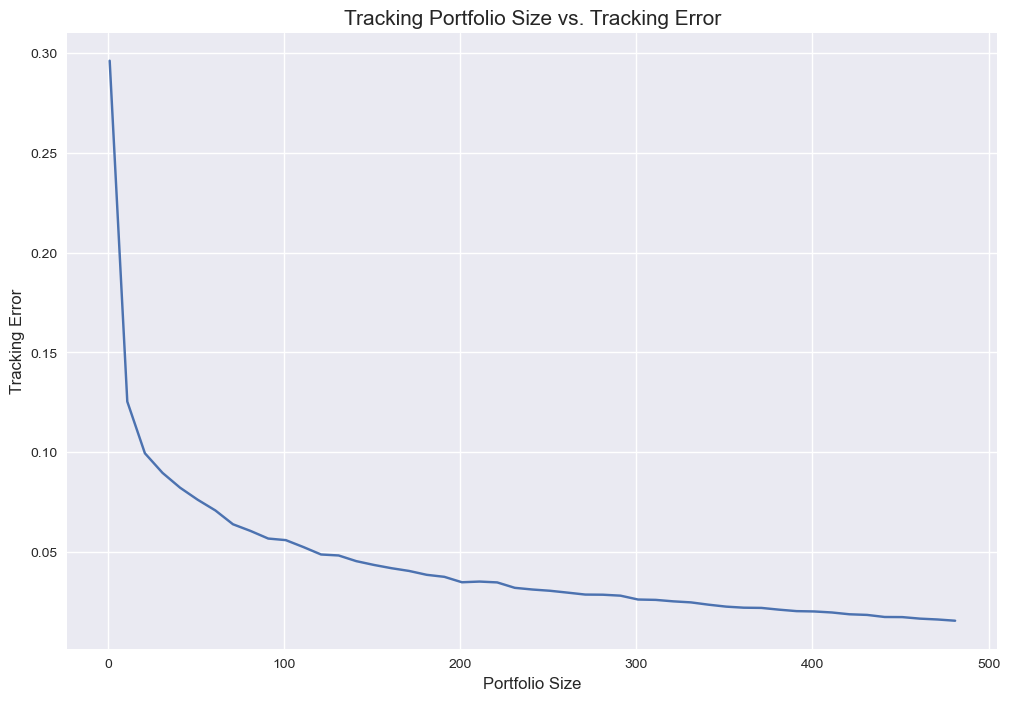

In [283]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, n + 1, 10), av_tres)
plt.title("Tracking Portfolio Size vs. Tracking Error", fontsize = 15)
plt.xlabel("Portfolio Size", fontsize = 12)
plt.ylabel("Tracking Error", fontsize = 12)
plt.show()

## (Part 4): Example To Show:

In [633]:
n = len(const)
n

485

Target: Expected Tracking Error < 5%

In [635]:
i = 110
i

110

In [636]:
sims = 10000 # 10,000 random portfolios -> find the best tracking one!

In [637]:
np.random.seed(123)
min_te = 1
tstocks = None
tportfolio = None

for sim in range(sims):
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
    weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
    tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    active_returns = tracking_returns - returns[index]
    tracking_error = active_returns.std() * np.sqrt(252)
    tracking_portfolio = tracking_returns.add(1).cumprod() # normalized prices
    if tracking_error < min_te: # minimize TE
        min_te = tracking_error
        tstocks = tracking_stocks
        tportfolio = tracking_portfolio

In [638]:
min_te

0.036663607204054746

In [639]:
tstocks

array(['WDC', 'ITW', 'O', 'AVY', 'ED', 'MSI', 'NTRS', 'AOS', 'FI', 'CB',
       'REG', 'FITB', 'EL', 'APD', 'T', 'LH', 'HSIC', 'ROL', 'QCOM',
       'VST', 'OXY', 'TXN', 'ZBRA', 'NEE', 'TAP', 'MNST', 'FE', 'SWKS',
       'DAL', 'BLK', 'VLO', 'SYK', 'CAG', 'MCO', 'STLD', 'DVN', 'CZR',
       'EQT', 'ADP', 'CBRE', 'ANET', 'ALB', 'GM', 'HES', 'LMT', 'NVR',
       'CHRW', 'CVS', 'MOH', 'VTRS', 'UNH', 'AXON', 'ADM', 'CSCO', 'ECL',
       'DTE', 'ADI', 'CTLT', 'HBAN', 'PEG', 'JPM', 'CTSH', 'GRMN', 'AES',
       'SYF', 'BG', 'DG', 'REGN', 'COF', 'NKE', 'AZO', 'VMC', 'BRO',
       'GIS', 'CVX', 'IQV', 'HWM', 'PNR', 'BMY', 'MCD', 'TPR', 'BR',
       'CSX', 'DELL', 'MSFT', 'AMAT', 'CPT', 'APA', 'MPC', 'XYL', 'TMO',
       'KIM', 'NVDA', 'PKG', 'UPS', 'PLD', 'PFG', 'PARA', 'SBUX', 'NOW',
       'APTV', 'ADBE', 'STT', 'GD', 'HD', 'ALL', 'CHD', 'CINF', 'GDDY',
       'HST'], dtype=object)

In [640]:
tportfolio

Date
2019-01-02    1.000000
2019-01-03    0.972212
2019-01-04    1.005075
2019-01-07    1.013453
2019-01-08    1.020539
                ...   
2024-09-25    2.322538
2024-09-26    2.331941
2024-09-27    2.330894
2024-09-30    2.339109
2024-10-01    2.313795
Length: 1447, dtype: float64

In [641]:
tportfolio.name = "Tracking_Portfolio"

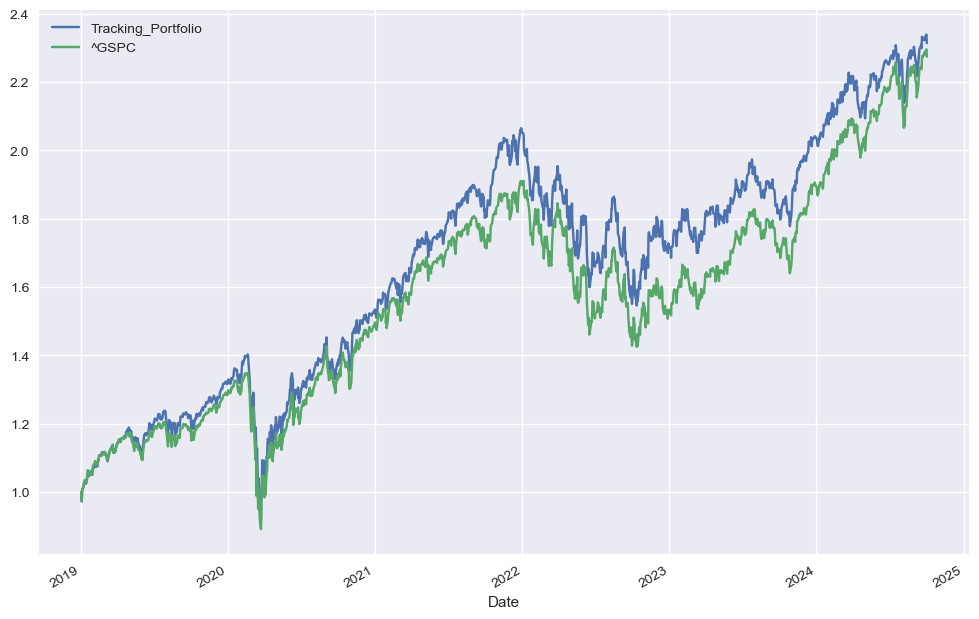

In [642]:
tportfolio.plot(figsize = (12, 8))
norm[index].plot()
plt.legend()
plt.show()


In [643]:
norm["Tracking_Portfolio"] = tportfolio

In [644]:
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [645]:
tracking(norm.pct_change(), index)

,TrackingError,ActiveReturn
Ticker,,
A,0.211412,-0.004510
AAPL,0.198193,0.184913
ABBV,0.237421,-0.023075
ABT,0.203548,-0.064670
ACGL,0.249444,0.117772
...,...,...
ZBH,0.246689,-0.126770
ZBRA,0.307117,0.018049
ZTS,0.208097,-0.001120


We __optimized with historical data__ and tested tracking quality __"in-sample"__ on the same 
historical data! <br>
Problem: We __overestimate Tracking Quality__!<br>
__Better__: Testing Tracking Quality on future __"out-sample"__ data ("Forward Testing")

## Optimization and "out-sample" Testing (Part 1)

Splitting full Time Period into an __Optimization Period__ and a __Testing Period__

In [650]:
opt_start = "2019"
opt_end = "2021-06"

In [651]:
test_start = "2021-07"
test_end = "2022"

In [652]:
mcap.loc[opt_start:opt_end]

,A,AA,AAC,AACG,AACI,AACIU,AACIW,AADI,AAIC,AAIC^C,...,ZUO,ZVIA,ZWRK,ZWRKU,ZWRKW,ZWS,ZYME,ZYNE,ZYXI,NaN
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1.944691e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,1.873049e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,1.937882e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,1.979031e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,2.008043e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,4.342027e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-25,4.360085e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-28,4.379328e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Optimization (Jan 2019 - Jun 2021)__

In [655]:
i = 110

In [656]:
start = opt_start
end = opt_end

In [657]:
np.random.seed(123)
min_te = 1
tstocks = None
tportfolio = None
for sim in range(sims):
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
    weights_VWI = mcap.loc[start:end,tracking_stocks].div(mcap.loc[start:end,tracking_stocks].sum(axis = "columns"), axis = "rows")
    tracking_returns = returns.loc[start:end, tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    active_returns = tracking_returns - returns.loc[start:end, index]
    tracking_error = active_returns.std() * np.sqrt(252)
    tracking_portfolio = tracking_returns.add(1).cumprod()
    if tracking_error < min_te:
        min_te = tracking_error
        tstocks = tracking_stocks
        tportfolio = tracking_portfolio

In [658]:
min_te

0.029329888934372182

In [659]:
tstocks

array(['AMD', 'GE', 'MO', 'TJX', 'NUE', 'DUK', 'CHRW', 'EIX', 'PG',
       'GDDY', 'SYF', 'SPG', 'ANET', 'NRG', 'JBL', 'OKE', 'LEN', 'HII',
       'FRT', 'META', 'ALLE', 'CME', 'GRMN', 'HUBB', 'ULTA', 'MDT', 'PPG',
       'PHM', 'MSFT', 'CZR', 'RCL', 'EBAY', 'CCI', 'SYK', 'UNP', 'FDX',
       'IRM', 'AMAT', 'SRE', 'DLTR', 'TMO', 'SBAC', 'CBRE', 'JPM', 'RL',
       'BKNG', 'DG', 'L', 'HSIC', 'ROP', 'TER', 'TECH', 'DXCM', 'EA',
       'LYB', 'PNC', 'T', 'TFC', 'LIN', 'LULU', 'TFX', 'USB', 'LRCX',
       'SPGI', 'NOC', 'SNPS', 'RF', 'VTRS', 'BWA', 'PFG', 'NXPI', 'VZ',
       'GL', 'COO', 'EMR', 'EXC', 'FAST', 'LW', 'MSI', 'FI', 'PCG', 'KMB',
       'VST', 'NOW', 'VLO', 'CTAS', 'IP', 'EPAM', 'BRK-B', 'AVY', 'ABBV',
       'MCD', 'MAR', 'BMY', 'SBUX', 'FITB', 'WDC', 'TSN', 'SHW', 'AXP',
       'MNST', 'BIIB', 'CE', 'HSY', 'WTW', 'CVS', 'PTC', 'HCA', 'REG',
       'AEP'], dtype=object)

In [660]:
tportfolio

Date
2019-01-02    1.000000
2019-01-03    0.973800
2019-01-04    1.005178
2019-01-07    1.009530
2019-01-08    1.018576
                ...   
2021-06-24    1.722045
2021-06-25    1.724400
2021-06-28    1.733730
2021-06-29    1.734707
2021-06-30    1.736756
Length: 629, dtype: float64

In [661]:
tportfolio.name = "Tracking_Portfolio"

In [662]:
opt = pd.concat([tportfolio.loc[start:end], norm.loc[start:end, index]], axis = 1)
opt

,Tracking_Portfolio,^GSPC
Date,,
2019-01-02,1.000000,1.000000
2019-01-03,0.973800,0.975243
2019-01-04,1.005178,1.008729
2019-01-07,1.009530,1.015801
2019-01-08,1.018576,1.025649
...,...,...
2021-06-24,1.722045,1.699777
2021-06-25,1.724400,1.705438
2021-06-28,1.733730,1.709386


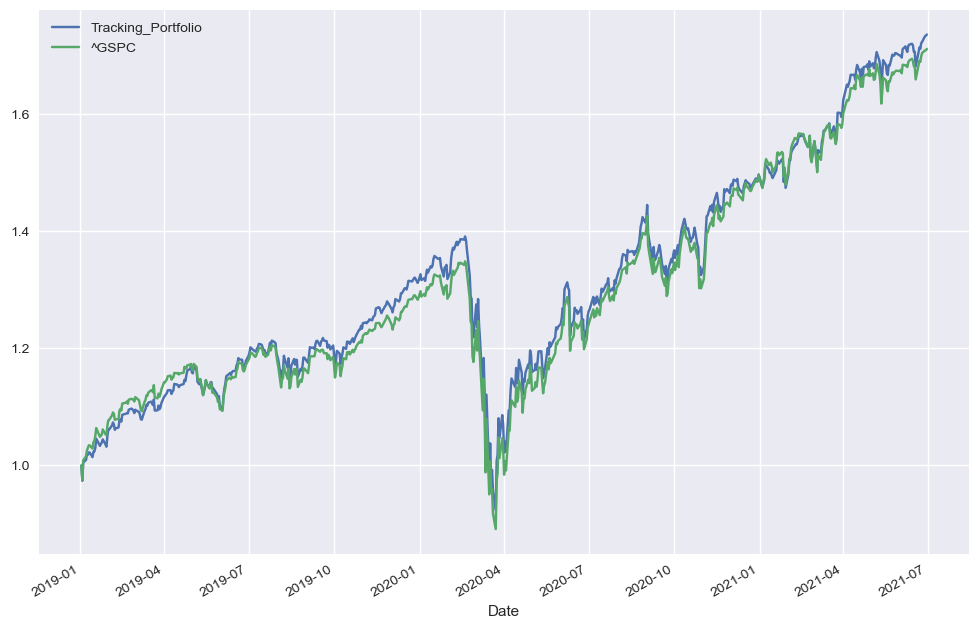

In [663]:
opt.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [664]:
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [665]:
tracking(opt.pct_change(), index)

,TrackingError,ActiveReturn
Tracking_Portfolio,0.02933,0.0053
^GSPC,0.00000,0.0000


__"out-sample" Testing (Jul 2021 - Nov 2022)__

In [668]:
tstocks # optimal Tracking Portfolio

array(['AMD', 'GE', 'MO', 'TJX', 'NUE', 'DUK', 'CHRW', 'EIX', 'PG',
       'GDDY', 'SYF', 'SPG', 'ANET', 'NRG', 'JBL', 'OKE', 'LEN', 'HII',
       'FRT', 'META', 'ALLE', 'CME', 'GRMN', 'HUBB', 'ULTA', 'MDT', 'PPG',
       'PHM', 'MSFT', 'CZR', 'RCL', 'EBAY', 'CCI', 'SYK', 'UNP', 'FDX',
       'IRM', 'AMAT', 'SRE', 'DLTR', 'TMO', 'SBAC', 'CBRE', 'JPM', 'RL',
       'BKNG', 'DG', 'L', 'HSIC', 'ROP', 'TER', 'TECH', 'DXCM', 'EA',
       'LYB', 'PNC', 'T', 'TFC', 'LIN', 'LULU', 'TFX', 'USB', 'LRCX',
       'SPGI', 'NOC', 'SNPS', 'RF', 'VTRS', 'BWA', 'PFG', 'NXPI', 'VZ',
       'GL', 'COO', 'EMR', 'EXC', 'FAST', 'LW', 'MSI', 'FI', 'PCG', 'KMB',
       'VST', 'NOW', 'VLO', 'CTAS', 'IP', 'EPAM', 'BRK-B', 'AVY', 'ABBV',
       'MCD', 'MAR', 'BMY', 'SBUX', 'FITB', 'WDC', 'TSN', 'SHW', 'AXP',
       'MNST', 'BIIB', 'CE', 'HSY', 'WTW', 'CVS', 'PTC', 'HCA', 'REG',
       'AEP'], dtype=object)

In [669]:
start = test_start
end = test_end

In [670]:
weights_VWI = mcap.loc[start:end,tstocks].div(mcap.loc[start:end,tstocks].sum(axis = "columns"), axis = "rows")
tracking_returns = returns.loc[start:end, tstocks].mul(weights_VWI.shift()).sum(axis = "columns")
active_returns = tracking_returns - returns.loc[start:end, index]
tracking_error = active_returns.std() * np.sqrt(252)
tracking_portfolio = tracking_returns.add(1).cumprod()

In [671]:
tracking_error

0.03903994914383106

In [672]:
tracking_returns

Date
2021-07-01    0.000000
2021-07-02    0.006682
2021-07-06   -0.004883
2021-07-07    0.003350
2021-07-08   -0.011189
                ...   
2022-12-23    0.004762
2022-12-27   -0.001089
2022-12-28   -0.009380
2022-12-29    0.017856
2022-12-30   -0.003558
Length: 379, dtype: float64

In [673]:
tracking_returns.name = "Tracking Portfolio"

In [674]:
test = pd.concat([tracking_returns.loc[start:end], returns.loc[start:end, index]], axis = 1)
test

,Tracking Portfolio,^GSPC
Date,,
2021-07-01,0.000000,0.005222
2021-07-02,0.006682,0.007500
2021-07-06,-0.004883,-0.002022
2021-07-07,0.003350,0.003359
2021-07-08,-0.011189,-0.008561
...,...,...
2022-12-23,0.004762,0.005868
2022-12-27,-0.001089,-0.004050
2022-12-28,-0.009380,-0.012021


In [675]:
tracking(test, index)

,TrackingError,ActiveReturn
Tracking Portfolio,0.03904,-0.013008
^GSPC,0.00000,0.000000


In [676]:
test = test.add(1).cumprod()
test

,Tracking Portfolio,^GSPC
Date,,
2021-07-01,1.000000,1.005222
2021-07-02,1.006682,1.012761
2021-07-06,1.001766,1.010713
2021-07-07,1.005122,1.014108
2021-07-08,0.993876,1.005426
...,...,...
2022-12-23,0.874088,0.894664
2022-12-27,0.873137,0.891041
2022-12-28,0.864946,0.880330


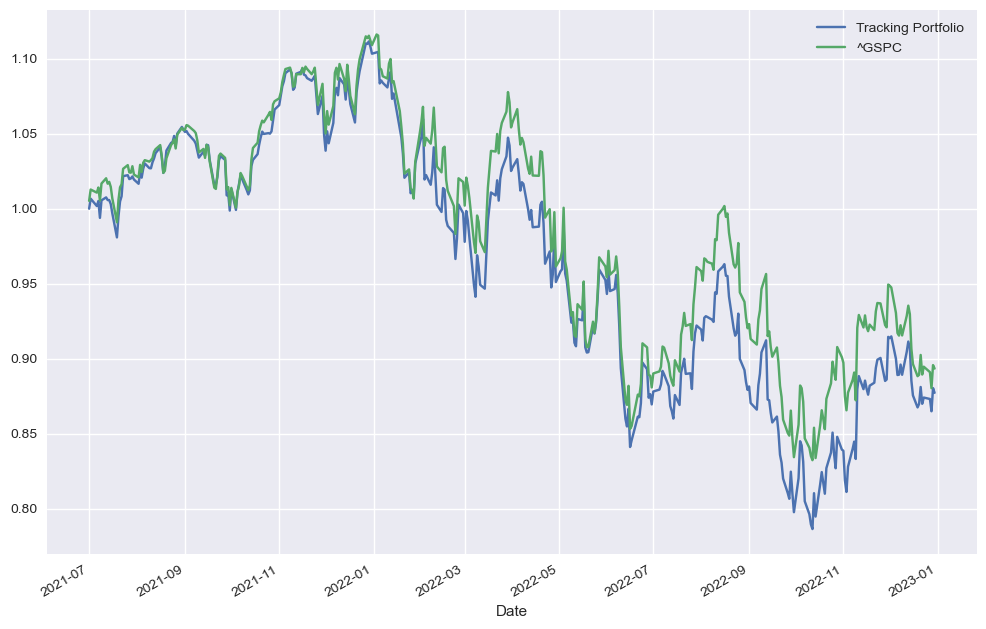

In [677]:
test.plot(figsize = (12, 8))
plt.legend()
plt.show()

- Higher Tracking Error and Active Return in "out-sample" Testing
- Reduce Active Return with 
    - Stratified Sampling
    - Larger Sample Size